In [1]:
import pandas as pd
import os

import datetime
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Bigger than normal fonts
sns.set(font_scale=1.2)

mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 불필요한 pandas warning 제거
pd.options.mode.chained_assignment = None

def xldate_to_datetime(xldate):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(days=xldate-2)
    
    return temp+delta

In [2]:
# k200 data 가져오기

k200_path = 'data/K200'
k200_ind_names = ['전체', '중공업', '산업재', '생활소비재', '철강소재', '정보기술', 
                  '에너지화학', '건강관리', '금융', '건설', '경기소비재']

k200_files = ['k200'+name+'.xlsx' for name in k200_ind_names]
print(k200_files)

def read_k200_data(file_name):
    
    df = pd.read_excel(os.path.join('data/K200', file_name))
    
    df1 = df.iloc[:, [0, 10, 11, 12, 1, 5]]
    df1.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    
    if df1['Date'].dtype == int:
        df1['Date'] = df1['Date'].apply(lambda x: xldate_to_datetime(x))
    
    
    return df1


df_list = []

for file_name, ind_name in zip(k200_files, k200_ind_names):
    
    df = read_k200_data(file_name)
    df = df[df['Date'] >= '2014-01-01']

    df = df.sort_values('Date')
    df['Change'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
    
    # 컬럼명 앞에 산업명 달아주기
    df.columns = list(df.columns[0:1]) + [ind_name+'_'+col for col in df.columns[1:]]
    
    df_list.append(df)

    
# 전체 데이터셋 merge
df_all_dates = pd.concat(df_list, axis=0)[['Date']].drop_duplicates()
df_k200 = reduce(lambda left,right: pd.merge(left,right,on='Date', how='left'), [df_all_dates] + df_list) 
df_k200 = df_k200.sort_values('Date')

['k200전체.xlsx', 'k200중공업.xlsx', 'k200산업재.xlsx', 'k200생활소비재.xlsx', 'k200철강소재.xlsx', 'k200정보기술.xlsx', 'k200에너지화학.xlsx', 'k200건강관리.xlsx', 'k200금융.xlsx', 'k200건설.xlsx', 'k200경기소비재.xlsx']


/Users/young-joonjeon/opt/miniconda3/envs/ssf/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [3]:
df_k200

,Date,전체_Open,전체_High,전체_Low,전체_Close,전체_Volume,전체_Change,중공업_Open,중공업_High,중공업_Low,...,건설_Low,건설_Close,건설_Volume,건설_Change,경기소비재_Open,경기소비재_High,경기소비재_Low,경기소비재_Close,경기소비재_Volume,경기소비재_Change
0,2014-01-02,264.35,264.51,257.63,257.64,64004,NaN,522.85,526.08,511.74,...,379.22,379.27,5768,NaN,2081.14,2083.40,1993.11,1993.11,10254,NaN
1,2014-01-03,257.05,257.29,253.18,254.48,62393,-0.012265,511.02,511.23,498.51,...,370.68,374.32,5507,-0.013051,1998.38,2003.53,1963.31,1977.16,7900,-0.008003
2,2014-01-06,254.70,256.67,254.11,255.41,59076,0.003655,505.92,510.03,505.36,...,362.11,362.62,6424,-0.031257,1978.31,2001.53,1968.14,1995.97,9390,0.009514
3,2014-01-07,254.53,257.02,254.41,255.98,60982,0.002232,505.51,523.51,505.38,...,362.21,363.98,6290,0.003750,1994.97,2018.60,1994.49,2004.79,10199,0.004419
4,2014-01-08,256.85,257.06,254.63,255.76,66026,-0.000859,521.70,522.74,515.47,...,364.49,368.47,6236,0.012336,2018.08,2023.34,2003.38,2018.62,10299,0.006898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,2019-10-31,276.84,279.04,275.82,275.82,78339,0.001125,268.96,270.24,267.01,...,235.78,235.78,4508,-0.002243,1352.43,1371.14,1352.10,1357.23,8428,0.001860
1431,2019-11-01,276.17,278.55,275.59,278.43,58542,0.009463,265.29,265.95,262.41,...,234.57,235.71,3037,-0.000297,1355.99,1374.44,1354.18,1372.41,7363,0.011185
1432,2019-11-04,279.90,282.77,279.90,282.54,76998,0.014761,265.49,267.80,263.65,...,237.83,243.58,5911,0.033388,1377.62,1387.39,1373.76,1385.07,8083,0.009225
1433,2019-11-05,282.99,284.46,282.27,284.38,76359,0.006512,268.21,272.08,267.11,...,243.37,247.77,5884,0.017202,1389.34,1395.04,1384.39,1392.69,8000,0.005502


In [4]:
# S&P 500 data 가져오기

SNP_path = 'data/SNP'
SNP_ind_names = ['Total', 'Materials', 'Energy', 'Industrials', 'ConsumerStaples', 'ConsumerDiscretionary', 'IT', 
                 'HealthCare', 'Financials', 'RealEstate', 
                'CommunicationServices' , 'Utilities', 
                 ]

SNP_files = [name+'.xls' for name in SNP_ind_names]
print(SNP_files)

def read_SNP_data(file_name):
    
    df = pd.read_excel(os.path.join('data/SNP', file_name), skiprows=range(6)).dropna()
    df1 = df.iloc[:, [0, 3]]
    df1.columns = ['Date', 'Close']
    df1['Date'] = pd.to_datetime(df1['Date'].astype(str).str.slice(0,10))
    
    return df1


df_list = []

for file_name, ind_name in zip(SNP_files, SNP_ind_names):
    
    df = read_SNP_data(file_name)
    df = df[df['Date'] >= '2014-01-01']

    df = df.sort_values('Date')
    df['Change'] = (df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)
    
    # 컬럼명 앞에 산업명 달아주기
    df.columns = list(df.columns[0:1]) + [ind_name+'_'+col for col in df.columns[1:]]
    
    df_list.append(df)

    
# 전체 데이터셋 merge
df_all_dates = pd.concat(df_list, axis=0)[['Date']].drop_duplicates()
df_snp500 = reduce(lambda left,right: pd.merge(left,right,on='Date', how='left'), [df_all_dates] + df_list)
df_snp500 = df_snp500.sort_values('Date')

['Total.xls', 'Materials.xls', 'Energy.xls', 'Industrials.xls', 'ConsumerStaples.xls', 'ConsumerDiscretionary.xls', 'IT.xls', 'HealthCare.xls', 'Financials.xls', 'RealEstate.xls', 'CommunicationServices.xls', 'Utilities.xls']


/Users/young-joonjeon/opt/miniconda3/envs/ssf/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [5]:
df_snp500

,Date,Total_Close,Total_Change,Materials_Close,Materials_Change,Energy_Close,Energy_Change,Industrials_Close,Industrials_Change,ConsumerStaples_Close,...,HealthCare_Close,HealthCare_Change,Financials_Close,Financials_Change,RealEstate_Close,RealEstate_Change,CommunicationServices_Close,CommunicationServices_Change,Utilities_Close,Utilities_Change
0,2014-11-05,2023.57,NaN,301.76,NaN,628.79,NaN,476.68,NaN,488.78,...,778.22,NaN,324.54,NaN,NaN,NaN,161.12,NaN,236.50,NaN
1,2014-11-06,2031.21,0.003776,304.24,0.008218,636.84,0.012802,481.92,0.010993,489.76,...,782.64,0.005680,324.78,0.000740,NaN,NaN,159.78,-0.008317,232.24,-0.018013
2,2014-11-07,2031.92,0.000350,305.78,0.005062,642.80,0.009359,482.39,0.000975,491.08,...,775.27,-0.009417,324.95,0.000523,NaN,NaN,161.07,0.008074,234.58,0.010076
3,2014-11-10,2038.26,0.003120,306.58,0.002616,637.45,-0.008323,484.71,0.004809,493.18,...,783.00,0.009971,326.57,0.004985,NaN,NaN,161.40,0.002049,235.78,0.005116
4,2014-11-11,2039.68,0.000697,308.00,0.004632,639.12,0.002620,484.09,-0.001279,492.30,...,785.77,0.003538,325.83,-0.002266,NaN,NaN,161.24,-0.000991,234.95,-0.003520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2019-10-30,3046.77,0.003253,368.78,-0.000136,428.68,-0.021211,668.93,0.003330,628.60,...,1097.02,0.007781,478.62,-0.001440,244.09,0.006183,171.36,0.001929,324.36,0.008645
1255,2019-10-31,3037.56,-0.003023,364.73,-0.010982,426.66,-0.004712,661.33,-0.011361,627.29,...,1095.58,-0.001313,475.99,-0.005495,243.21,-0.003605,171.82,0.002684,325.85,0.004594
1256,2019-11-01,3066.91,0.009662,370.03,0.014531,437.36,0.025079,675.93,0.022077,627.30,...,1097.41,0.001670,482.76,0.014223,242.52,-0.002837,173.25,0.008323,325.17,-0.002087
1257,2019-11-04,3078.27,0.003704,372.93,0.007837,451.12,0.031461,684.05,0.012013,621.43,...,1093.62,-0.003454,487.06,0.008907,239.97,-0.010515,173.95,0.004040,321.00,-0.012824


In [6]:
# snp500 날짜 맞추기 -> 미국전일 and 한국당일

df_snp500['Date']= df_snp500['Date'].shift(-1)
df_snp500 = df_snp500.dropna()

df_all_dates = pd.concat([df_snp500, df_k200] , axis=0)[['Date']].drop_duplicates()
df_all = pd.merge(df_all_dates, df_snp500, on='Date', how='left')
df_all = pd.merge(df_all, df_k200, on='Date', how='left')
df_all = df_all.sort_values('Date')
df_all.to_excel('df_all.xlsx')

/Users/young-joonjeon/opt/miniconda3/envs/ssf/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
# 결측값 처리
# -> 전일 미국시장(당일새벽) 데이터 없는 경우 삭제
# -> 바로 당일에 미치는 영향만 분석

df_all = df_all.dropna()
df_all.describe()

,Total_Close,Total_Change,Materials_Close,Materials_Change,Energy_Close,Energy_Change,Industrials_Close,Industrials_Change,ConsumerStaples_Close,ConsumerStaples_Change,...,건설_Low,건설_Close,건설_Volume,건설_Change,경기소비재_Open,경기소비재_High,경기소비재_Low,경기소비재_Close,경기소비재_Volume,경기소비재_Change
count,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,...,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.000000,743.0000,743.000000
mean,2631.325303,0.000479,347.570915,0.000376,501.487389,0.000070,603.575087,0.000443,563.346218,0.000174,...,272.344899,274.885236,6977.916555,-0.000075,1503.929946,1514.060377,1492.992732,1503.893513,10270.7214,-0.000115
std,246.775722,0.008030,23.448293,0.009759,39.757537,0.011914,44.396183,0.009530,29.065502,0.007260,...,21.379723,21.899436,4627.999942,0.015976,123.322206,123.193794,123.384661,123.245566,4525.3304,0.010306
min,2085.180000,-0.040979,289.660000,-0.035617,398.390000,-0.043547,487.080000,-0.044599,500.590000,-0.037308,...,221.410000,224.070000,2155.000000,-0.054976,1199.250000,1205.950000,1194.620000,1202.890000,4757.0000,-0.039847
25%,2432.840000,-0.002544,330.310000,-0.005037,473.940000,-0.006234,571.865000,-0.003841,541.510000,-0.003348,...,258.750000,261.365000,4371.000000,-0.009335,1402.895000,1414.255000,1391.375000,1401.785000,7866.5000,-0.006203
50%,2675.810000,0.000603,349.770000,0.000479,498.940000,0.000161,613.590000,0.001047,562.330000,0.000230,...,272.300000,274.340000,5775.000000,-0.000498,1523.430000,1532.180000,1512.300000,1522.970000,9298.0000,0.000092
75%,2829.895000,0.004511,366.105000,0.006009,533.860000,0.006698,637.860000,0.005617,580.265000,0.004517,...,284.100000,286.915000,7717.500000,0.008540,1603.930000,1616.810000,1597.945000,1607.270000,11320.0000,0.006185
max,3078.270000,0.049594,401.590000,0.046193,578.510000,0.062426,684.050000,0.048020,630.400000,0.028426,...,349.690000,352.880000,41217.000000,0.090131,1724.080000,1731.860000,1715.780000,1721.990000,58589.0000,0.036628


## 상관계수 구하기

In [8]:
corr = df_all.corr().loc[[name+'_Change' for name in SNP_ind_names], [name+'_Change' for name in k200_ind_names]]
corr.style.background_gradient(cmap='Blues')

,전체_Change,중공업_Change,산업재_Change,생활소비재_Change,철강소재_Change,정보기술_Change,에너지화학_Change,건강관리_Change,금융_Change,건설_Change,경기소비재_Change
Total_Change,0.333821,0.23421,0.190392,0.101508,0.236815,0.275198,0.236068,0.125148,0.226655,0.200024,0.140621
Materials_Change,0.320509,0.253137,0.218361,0.0533081,0.306225,0.233753,0.261149,0.105737,0.208309,0.212665,0.151172
Energy_Change,0.226787,0.246089,0.0988724,0.0294668,0.201764,0.165381,0.191126,0.0793232,0.156914,0.194203,0.108253
Industrials_Change,0.316673,0.255323,0.200343,0.0646753,0.26975,0.238458,0.257169,0.119546,0.248149,0.196293,0.128711
ConsumerStaples_Change,0.171933,0.135232,0.14513,0.122604,0.109342,0.128878,0.154536,0.0830753,0.0924656,0.133217,0.132835
ConsumerDiscretionary_Change,0.277865,0.178591,0.155051,0.0745886,0.218259,0.228442,0.17285,0.0865243,0.171892,0.15703,0.117471
IT_Change,0.299088,0.163024,0.136613,0.0866973,0.162467,0.288538,0.178852,0.0768386,0.170617,0.124573,0.0975534
HealthCare_Change,0.270457,0.211927,0.201308,0.0822981,0.191694,0.216009,0.220389,0.183528,0.185053,0.22275,0.0926194
Financials_Change,0.287609,0.231082,0.173479,0.0783372,0.235924,0.203868,0.20464,0.112603,0.283811,0.182286,0.120667
RealEstate_Change,0.209254,0.125772,0.132807,0.158822,0.151604,0.167266,0.179121,0.096756,0.0702621,0.129781,0.153235


## 회귀선을 포함한 산점도 그리기

In [12]:
import statsmodels.api as sm

def linear_regression(X, y):

    # with statsmodels
    X = sm.add_constant(X) # adding a constant

    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # 회귀분석 결과의 출력
#     print_model = model.summary()
#     print(print_model)
    
    return model.params, predictions

    
def plot_scatter(x, y, predictions, x_ind_name, y_ind_name, params):
    
    plt.figure(figsize=(10, 6))

    ax = sns.regplot(x=x_ind_name+"_Change", y=y_ind_name+"_Change", data=df_all, color='blue'
                     , scatter_kws={'alpha':0.3},
                     line_kws={'label':"y={0:.2f}x+{1:.2f}".format(params[1],params[0])})
    
    # plot legend
    ax.legend()
    
    plt.title('S&P500 (' + x_ind_name + ') vs ' + 'K200 (' + y_ind_name + ')')
    plt.show()
    
    
def reg_and_plot(SNP_ind_name, k200_ind_name):
    
    X, y = df_all[SNP_ind_name+'_Change'], df_all[k200_ind_name+'_Change']
    params, predictions = linear_regression(X, y)
    plot_scatter(X, y, predictions, SNP_ind_name, k200_ind_name, params)
    

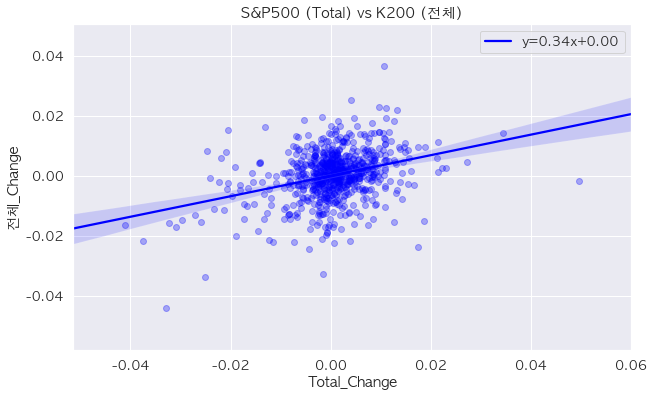

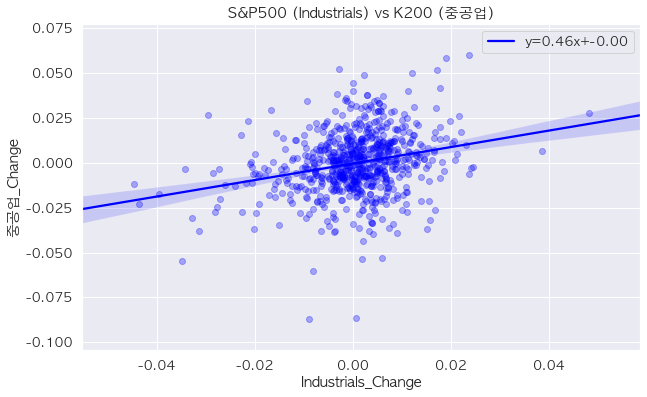

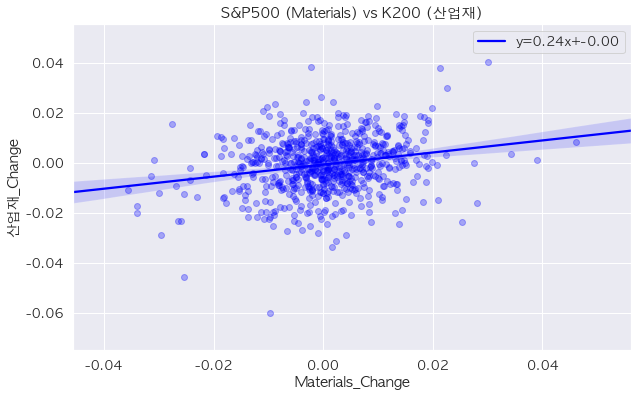

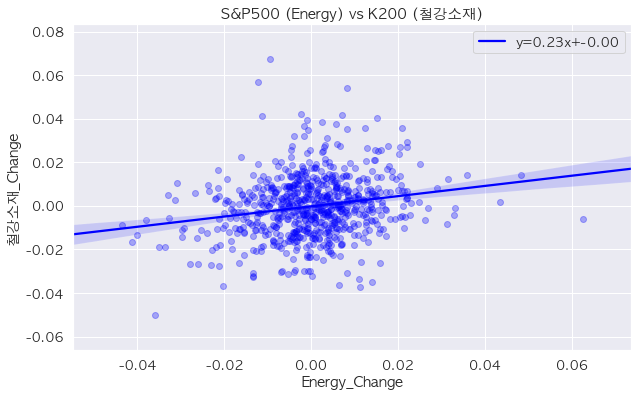

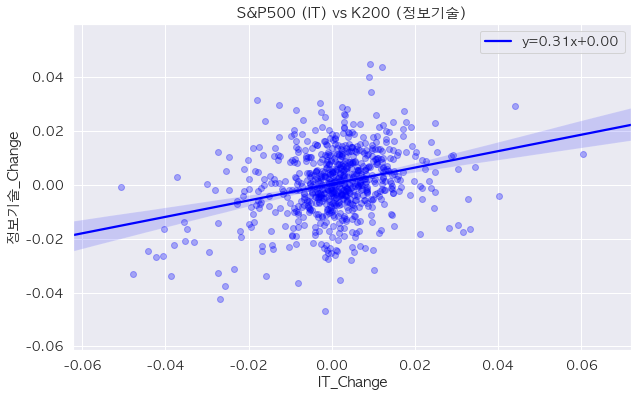

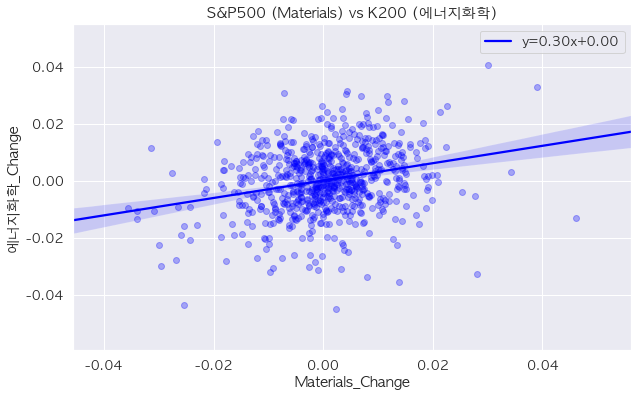

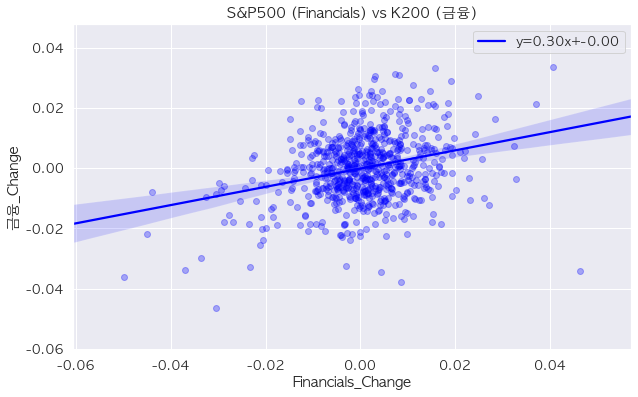

In [14]:
# 상관계수가 높은 조합들
reg_and_plot('Total', '전체')
reg_and_plot('Industrials', '중공업')
reg_and_plot('Materials', '산업재')
reg_and_plot('Energy', '철강소재')
reg_and_plot('IT', '정보기술')
reg_and_plot('Materials', '에너지화학')
reg_and_plot('Financials', '금융')